# Documentación Práctica 1

## Clase Nodo

Documentación clase Nodo:

En primer lugar para la realización del algoritmo deberemos crear la clase nodo, donde almacenaremos todos los datos correspondientes a los mismos, los valores que necesitan nuestros nodos para encontrar la solución serán:

-Casilla: Posición del mapa 

-H: Cota optimista para el recorte de nodos

-G: Coste del paso de nodos

-F: Coste total de nodo

-Padre: Objeto Nodo padre del nodo actual


In [ ]:
class Nodo():
        #Constructor de nodos
    def __init__(self, casilla,g , h,padre):
        #Casilla que lo forma
        self.casilla = casilla
        #Coste incial
        self.g = g
        #Cota optimista
        self.h = h
        #Coste
        self.f = g + h
        #Padre
        self.padre = padre

Desde esta clase desarrollaremos los métodos de comparación que nos permitirán conocer cuales de los nodos son iguales o cuales tienen un menor coste y por lo tanto son candidatos para ser explorados, estas sobrecargas de los operadores serán las que simplifique la lectura de nuestro código y permitan su correcto funcionamiento.

In [ ]:
    #Ordena los elementos
    #Sobrecarga operador <
    def __lt__(self, other):
        return self.f < other.f
    #Sobrecarga operador ==
    def __eq__(self, other):
        return self.casilla == other.casilla

Sabremos que un nodo es menor que otro cuando la función de coste total es decir la componente f sea menor en valor que con la que comparamos.

En cuanto a la sobrecarga del operador "==" sabremos que un nodo es igual que otro cuando las casillas que representan sean iguales.

Ahora debemos crear la función que creará todos los nodos hijos y los meterá en una lista de nodos, cabe recalcar que estos nodos hijos tendrán diferentes costes en su valor g, teniendo los diagonales un coste mayor (1,5) y los horizontales y verticales un coste de (1), es decir que los costes de la creción de nuevos nodos seguirán el siguiente esquema:

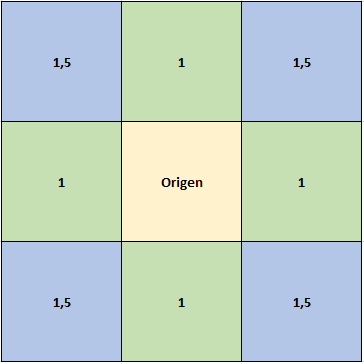

Al estar el mapa en forma de matriz solo deberemos fijarnos en los indices para añadir las casillas circundantes y no la casilla padre, también deberemos comprabar que estos nodos son transitables, al ser una función del main no podremos usar la función bueno() y deberemos comprobar que la celda a la que queremos acceder tiene valor = 0, es decir en la parte gráfica de nuestro programa aquellas que no son de color rojo.

Dados todos estos factores el código para extraer los nodos vecinos será el siguiente:

In [ ]:

# Devuelve la lista de Nodos circundantes Accesibles
    def NodosAlrededor(self, mapi, destino):
        coords = []
        h = 0
        for corX in range(self.casilla.getCol()-1, self.casilla.getCol()+2):

            for corY in range(self.casilla.getFila()-1, self.casilla.getFila()+2):

                if not (corX == self.casilla.getCol() and corY == self.casilla.getFila()) and mapi.getCelda(corY, corX) == 0:
                    #h = manhattanD(Casilla(corY, corX), destino)
                    #h = euclidea(Casilla(corY,corX),destino)
                    #h = chebysev(Casilla(corY,corX),destino)
                    #h = cosSim(Casilla(corY,corX),destino)
                    h = 0
                    if (self.casilla.getCol() != corX) and (self.casilla.getFila() != corY):
                        coords.append(Nodo(Casilla(corY, corX), self.g + 1.5, h, self))
                    else:
                        coords.append( Nodo(Casilla(corY, corX), self.g + 1, h, self))

        return list(coords)

En esta función también calcularemos nuestra cota optimista, descomentando las lineas de código aquí marcadas en verde podremos seleccionar entre las diferentes heurísticas, las implementadas para esta práctica han sido Manhattan, Euclidea, Chebysev y Similitud de cosenos (cosSim) si dejamos todas las lineas comentadas lo que haremos es que se realice el algoritmo con h = 0, es decir sin heurística.

## Heurísticas Implementadas

Las heurísticas son aquellas funciones matemáticas que nos permiten calcular la cota optimista es decir el valor H de nuestros nodos, con ellas realizaremos la poda de aquellos nodos que no nos interesa explorar, comparando las distancias con los valores de menor peso para obtener el camino más corto a nuestro destino

### Sin Heurística

Al no implementar una heurística nuestro valor de H pasará a tener un valor de 0, lo que supondrá que nuestro algoritmo no realizará ninguna poda y por lo tanto se recorrerán todos los posibles nodos del mapa hasta dar con la solución correcta, se podría considerar un algoritmo de fuerza bruta o ciego ya que se probarán soluciones sin ningún criterio. La traza en nuestro entorno gráfico sería la siguiente, siendo el color azul todos los nodos explorados:

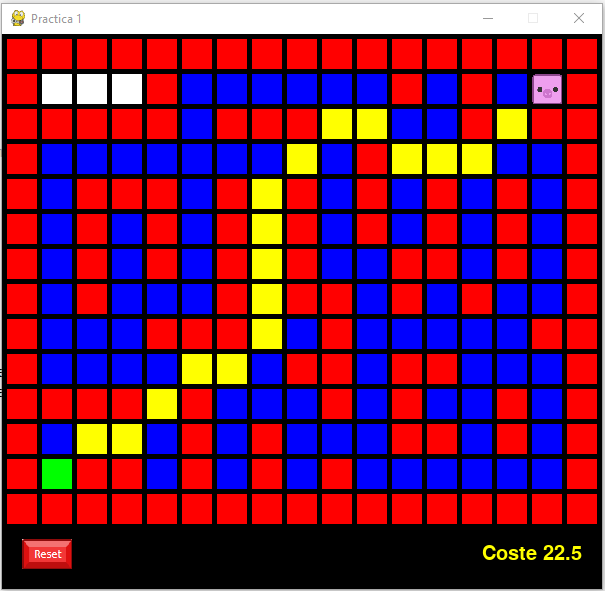

Como se puede observar las casillas marcadas en azul son las exploradas por el algoritmo, además se marca en amarillo el camino más corto.

### Distancia Manhattan


La geometría del taxista, considerada por Hermann Minkowski en el siglo XIX, es una forma de geometría en la que la métrica usual de la geometría euclidiana es reemplazada por una nueva métrica en la que la distancia entre dos puntos es la suma de las diferencias (absolutas) de sus coordenadas.

La distancia Manhattan o longitud Manhttan (geometría del taxi) nos dice que la distancia entre dos puntos es la suma de las diferencias absolutas de sus coordenadas. Es decir, es la suma de las longitudes de los dos catetos del triángulo rectangulo. Algo así como la longitud de cualquier escalera que suba desde (a,b) con el punto (c,d). Una ruta que une el punto (a,b) y el (c,d) a través de segmentos horizontales y verticales.

Siguiendo la siguiente formula:



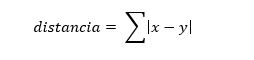

En nuestra implementación de código quedaría de la siguiente manera, pasando como parámetro las dos casillas de las que vamos a sacar su distancia, y obteniendo los valores X e Y con los métodos getFila() y getCol() respectivamente:

In [ ]:
def manhattanD(cas1, cas2):
    return abs(abs(cas1.getFila() - cas2.getFila()) + abs(cas1.getCol()- cas2.getCol()))

*Nota: Se realizan los valores absolutos de las restas para que no aparezcan valores negativos.

### Distancia Euclidea

En matemáticas, la distancia euclidiana o euclídea, es la distancia "ordinaria" entre dos puntos de un espacio euclídeo, la cual se deduce a partir del teorema de Pitágoras.

Por lo que para obtener los valores seguiremos la siguiente formula:

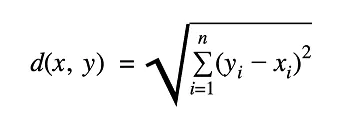

La implementación de nuestra distancia Euclidea quedaría de la siguiente manera utilizando la librería Math de python, la función Pow para elevar al cuadrado los elementos X e Y y Math.sqrt para realizar la raíz cuadrada

In [ ]:
def euclidea(cas1, cas2):
    return math.sqrt((cas2.getFila() - cas1.getFila())**2 + (cas2.getCol() - cas1.getCol())**2)

### Distancia Chebysov

En matemáticas, la distancia de Chebyshov es una métrica1​ definida en un espacio vectorial donde la distancia entre dos puntos (representados por sus vectores) es la mayor de sus diferencias a lo largo de cualquiera de sus dimensiones coordenadas.1​ Debe su nombre al matemático ruso Pafnuti Chebyshov.

También es conocida como distancia del tablero de ajedrez, porque coincide con el número mínimo de movimientos que necesita el rey para ir de una casilla a otra (este caso se corresponde a un sistema de dos coordenadas espaciales, entre los centros de las casillas, y con los ejes alineados con los bordes del tablero1​). 

Viene dada por la siguiente formula:

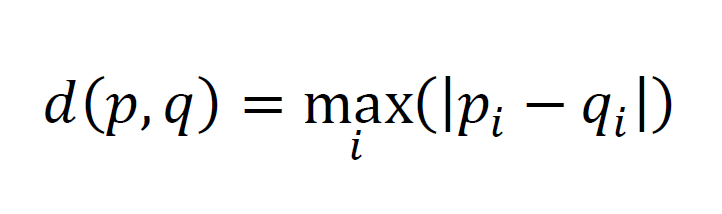

La implementación de nuestro código quedaría de la siguiente manera realizando el máximo de la resta de las componentes de los vectores:

In [ ]:
def chebysev(cas1,cas2):
    return max(abs(cas1.getFila() - cas2.getFila()), abs(cas1.getCol() - cas2.getCol()))

### Distancia por Similitud de Cosenos

La similitud coseno es una medida de la similitud existente entre dos vectores en un espacio que posee un producto interior con el que se evalúa el valor del coseno del ángulo comprendido entre ellos. Esta función trigonométrica proporciona un valor igual a 1 si el ángulo comprendido es cero, es decir si ambos vectores apuntan a un mismo lugar. Cualquier ángulo existente entre los vectores, el coseno arrojaría un valor inferior a uno. Si los vectores fuesen ortogonales el coseno se anularía, y si apuntasen en sentido contrario su valor sería -1. De esta forma, el valor de esta métrica se encuentra entre -1 y 1, es decir en el intervalo cerrado [-1,1].


Siguiendo la siguiente formula obtendremos la distancia:

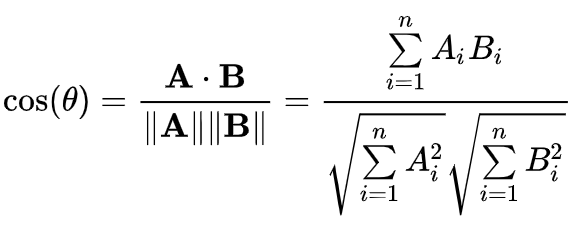

La implementación de nuestro código sería la siguiente:

In [ ]:
def cosSim(cas1,cas2):
    num = ((cas1.getFila()*cas2.getFila()) + (cas1.getCol()* cas2.getCol()))
    den1 = math.sqrt(pow(cas1.getFila(),2) + pow(cas2.getFila(),2))
    den2 = math.sqrt(pow(cas1.getCol(),2) + pow(cas2.getCol(),2))
    return num/(den1*den2)

## Algoritmo A*

### Contexto

El algoritmo de búsqueda A* es uno de los clasificados dentro de los algoritmos de búsqueda de grafos de tipo heurístico o informado.

Fue presentado por primera vez en 1968 por Peter E. Hart, Nils J. Nilsson y Bertram Raphael.

Este algoritmo siempre y cuando sea posible y cumpliendo ciertas condiciones el camino de menor coste entre un nodo origen y uno objetivo.

Para ello el Algoritmo A* para evitar realizar saltos demasiado grandes implementará la siguiente función:

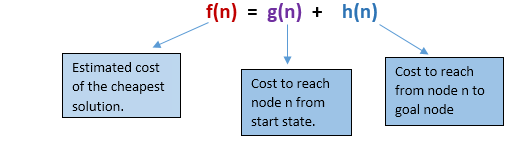

###Pseudocodigo


```
Alg A*
    listaInterior = vacio
    listaFrontera = inicio

    mientras listaFrontera no esté vacía
          n = obtener nodo de listaFrontera con menor f(n) = g(n) + h(n) 
          
          si n es meta devolver
              reconstruir camino desde la meta al inicio siguiendo los punteros
          Salir
          sino
              listaFrontera.del(n)
              listaInterior.add(n)
          
              para cada hijo m de n que no esté en lista interior
                  g’(m) = n·g + c(n, m) //g del nodo a explorar m
                  si m no está en listaFrontera
                      almacenar la f, g y h del nodo en (m.f, m.g, m.h) 
                      m.padre = n
                      listaFrontera.add(m)
                  sino si g’(m) es mejor que m.g //Verificamos si el nuevo
                      camino es mejor
                      m.padre = n
                      recalcular f y g del nodo m
                  fsi
              fpara 
    fmientras 
Error, no se encuentra solución
Falg

```

### Mi implementación del algoritmo

Mi implementación del algoritmo siguiendo el pseudocodigo explicado en clase y las indicaciones del profesorado es la siguiente:

In [ ]:
# Algoritmo A*
def aEstrella(mapi, origen, destino, camino):
    coste = -1
    nodoOrigen = Nodo(origen, 0, 0, None)
    itec  = 0

    #print("Empiezo en:", origen.getFila(), origen.getCol())

    listaInterior = []
    listaFrontera = nodoOrigen.NodosAlrededor(mapi, destino)

    if nodoOrigen.getCasilla() == destino:
        return 0

    while len(listaFrontera) != 0:
        itec = itec + 1
        # Sacamos el nodo con menor coste
        n = min(listaFrontera)

        #print("Exploro:", n.getCasilla().getFila(), n.getCasilla().getCol())

        if n.getCasilla() == destino:
            # Reconstrucción de camino
            aux = n.getPadre()
            coste = n.getG()

            # Cambia los valores de las celdas para imprimir el camino
            while aux:
                y = aux.getCasilla().getFila()
                x = aux.getCasilla().getCol()
                #print(x, y)
                camino[y][x] = n.getG()
                aux = aux.padre

            break

        else:
            listaFrontera.remove(n)
            listaInterior.append(n)

            for m in n.NodosAlrededor(mapi,destino):
                if m not in listaInterior:
                    if m not in listaFrontera:
                        # Almacenar la f, g y h del nodo en (m.f, m.g, m.h)
                        h = euclidea(m.getCasilla(),destino)
                        #h = manhattanD(m.getCasilla(), destino)
                        #h = chebysev(m.getCasilla(), destino)
                        #h = cosSim(m.getCasilla(), destino)
                        #h = 0;
                        aux =  Nodo(m.getCasilla(), m.g, h, n)
                        listaFrontera.append(aux)
                    elif m.g < listaFrontera[position(m,listaFrontera)].g:
                        listaFrontera[position(m,listaFrontera)].padre = n
                        listaFrontera[position(m,listaFrontera)].g = m.g


    print(itec)
    return coste

Para poder ejecutar el algoritmo necesitaremos tener implementada la función Position que nos dice la posición en la que se encuentra un elemento en una lista, su implementación es la siguiente:

In [ ]:
#Saca la posición de un objeto en una lista
def position(m, lista):
    h = -1
    for i in range(len(lista)):
        if lista[i]== m:
               h = i
    return h

###Explicación del Algoritmo por pasos

####Inicialización y caso base

En esta primera parte del algoritmo realizaremos la incialización de las listas de nodos asi como el coste base y el nodo origen, además pondremos el caso donde la casilla que se selecciona es la del origen.

Inicialización de listas:

**Lista Interior**: inicalmente esta se encuentra vacia, pero será en ella donde añadamos los nodos a explorar hijos del nodo que estamos analizando.

**Lista Frontera**: inicialmente son los nodos hijo (los de alrededor) a nuestro nodo origen.

In [ ]:
def aEstrella(mapi, origen, destino, camino):
    coste = -1
    nodoOrigen = Nodo(origen, 0, 0, None)
    itec  = 0

    #print("Empiezo en:", origen.getFila(), origen.getCol())

    listaInterior = []
    listaFrontera = nodoOrigen.NodosAlrededor(mapi, destino)

    if nodoOrigen.getCasilla() == destino:
        return 0


####Bucle While 

Este bucle while recorrera los nodos de la lista frontera y eligirá el nodo con menor f(n) = g(n) + h(n).

In [ ]:
    while len(listaFrontera) != 0:
        itec = itec + 1
        # Sacamos el nodo con menor coste
        n = min(listaFrontera)
        #print("Exploro:", n.getCasilla().getFila(), n.getCasilla().getCol())

#### Llegada a destino

Si este nodo es meta entonces terminaremos el bucle y recorreremos los nodos de manera ascendente hasta llegar al nodo origen sumando los costes en reversa y recorriendo los padres, mientras hacemos esto en cada una de las coordenadas del mapa cambiaremos el valor para que se represente el camino de color amarillo.

In [ ]:
if n.getCasilla() == destino:
            # Reconstrucción de camino
            aux = n.getPadre()
            coste = n.getG()

            # Cambia los valores de las celdas para imprimir el camino
            while aux:
                y = aux.getCasilla().getFila()
                x = aux.getCasilla().getCol()
                #print(x, y)
                camino[y][x] = n.getG()
                aux = aux.padre

            break

####Exploración de Nodos

Esta parte del algoritmo eliminará de la lista frontera el nodo y lo añadirá a la lista Interior para su posterior exploración.

Hecho esto pasaremos a recorrer todos los nodos hijos del valor N (el de coste menor).

Para cada nodo que recorramos tendremos que comprobar si esta en la lista interior, si esta en ella pasaremos al siguiente nodo.



In [ ]:
for m in n.NodosAlrededor(mapi,destino):
                if m not in listaInterior:
                    #y = m.getCasilla().getFila()
                    #x = m.getCasilla().getCol()
                    #camino[y][x] = 'c'

**Nota**: El código que se ve comentado es para colorear en el entorno gráfico los nodos explorados de color azul.

#####Recalcular coste y nodos

In [ ]:
 if m not in listaFrontera:
                        # Almacenar la f, g y h del nodo en (m.f, m.g, m.h)
                        #h = euclidea(m.getCasilla(),destino)
                        h = manhattanD(m.getCasilla(), destino)
                        #h = chebysev(m.getCasilla(), destino)
                        #h = cosSim(m.getCasilla(), destino)
                        #h = 0;
                        aux =  Nodo(m.getCasilla(), m.g, h, n)
                        listaFrontera.append(aux)

En esta parte del código se recalculará la distancia aplicando la heurística deseada a todos aquellos nodos que que no se encontraban en la lista frontera ni en la lista interior y por lo tanto tendremos que creearlos utilizando el constructor de nuestra clase nodo.

**Nota**: deberemos comentar y descomentar las lineas de código de las eurísticas para seleccionar cual queremos utilizar

In [ ]:
elif m.g < listaFrontera[position(m,listaFrontera)].g:
                        listaFrontera[position(m,listaFrontera)].padre = n
                        listaFrontera[position(m,listaFrontera)].g = m.g

En en el caso de que si estuviera en la lista frontera el nodo que nos encontramos explorando, tendremos que comprobar si su valor (g) es menor al de la rama que explaramos, si lo encontramos deberemos cambiar el padre, para que sea el nodo (n) y actualizaremos el valor (g) para que sea el del nodo que se encuentra en (m) en este instante

####Fin del algoritmo

En el fin del algoritmo devolveremos el coste calculado realizando la vuelta atras desde que encontramos el nodo destino, mirando los antecesores modificaremos la posición en el camino y en el destino y adjudicando al coste el valor (g) de (n).

In [ ]:
if n.getCasilla() == destino:
            # Reconstrucción de camino
            aux = n.getPadre()
            coste = n.getG()

            # Cambia los valores de las celdas para imprimir el camino
            while aux:
                y = aux.getCasilla().getFila()
                x = aux.getCasilla().getCol()
                #print(x, y)
                camino[y][x] = n.getG()
                aux = aux.padre

            break

In [ ]:
return coste

##Prueba de Heurísticas

Ahora se pasará a realizar una demostración de la implementación de todas las heurísticas mostrando en Amarillo el camino que encuentran como mejor (de menor coste), así como en Azul todos los nodos (posiciones del mapa) explorados por el A* utilizando cada una de las heurísticas en el mapa base.

###Prueba H = 0

####Mapa Gran Muro

180 Iteraciones

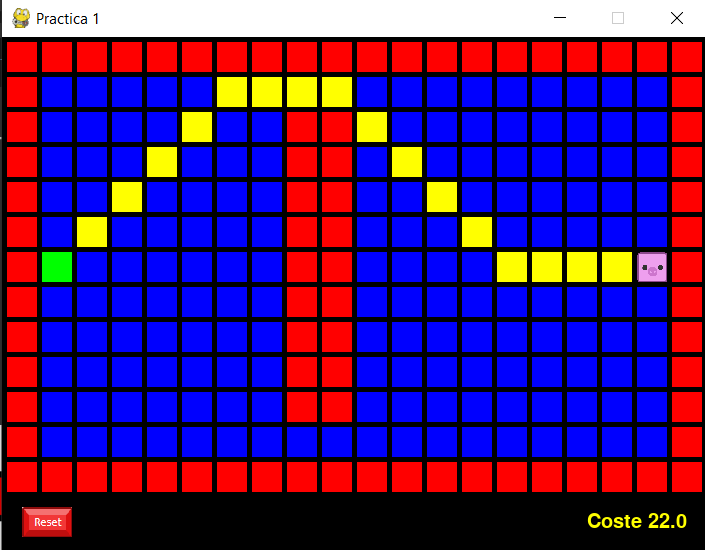

####Mapa Extraño



200 Iteraciones

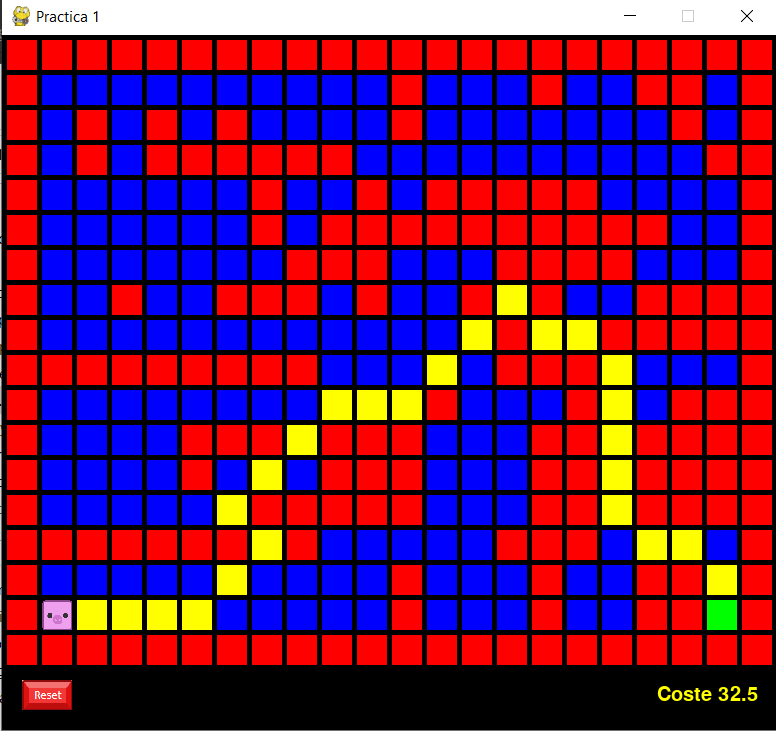

###Heurística Manhattan

####Mapa Gran Muro

93 iteraciones

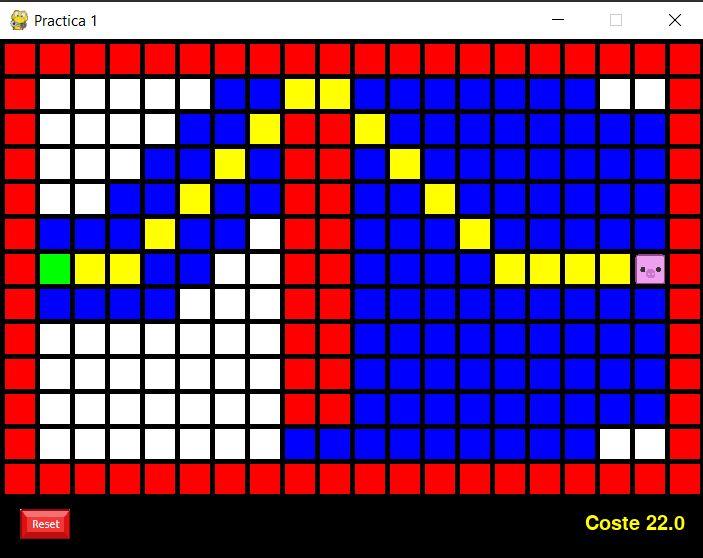

####Mapa Extraño

88 Iteraciones

image.png

###Heurística Euclidea

####Mapa Gran Muro

122 iteraciones

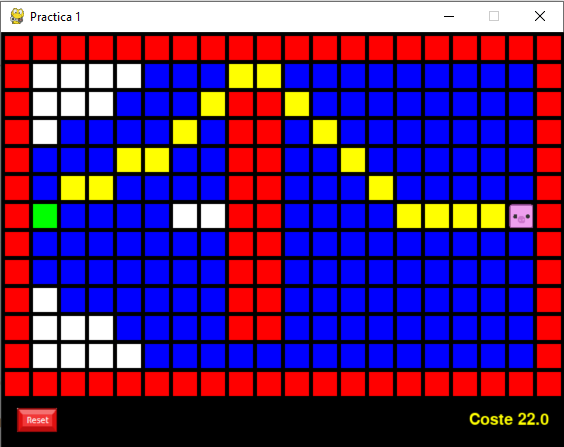

####Mapa Extraño

102 Iteraciones

image.png

###Heurística Chebysov

####Mapa Gran Muro

144 Iteraciones

image.png

####Mapa Extraño

106 Iteraciones

image.png



###Heurística de Similitud de Cosenos

####Mapa Gran Muro

180 Iteraciones

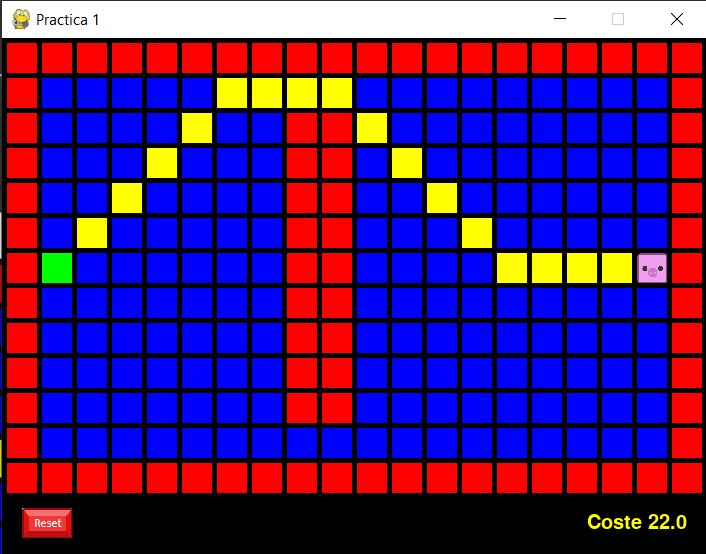

####Mapa Extraño

200 Iteraciones

image.png

###Conclusión de Heurísticas según los nodos explorados

Según la cantidad de los nodos explorados podemos afirmar que las dos mejores heurísticas implementadas son Euclidea y Manhattan,teniendo una ligera ventaja la heurística Manhattan al menos en los mapas implementados, para confirmar esto, solo debemos mirar la cantidad de nodos explorados colocados encima de cada uno de los mapas implementados.

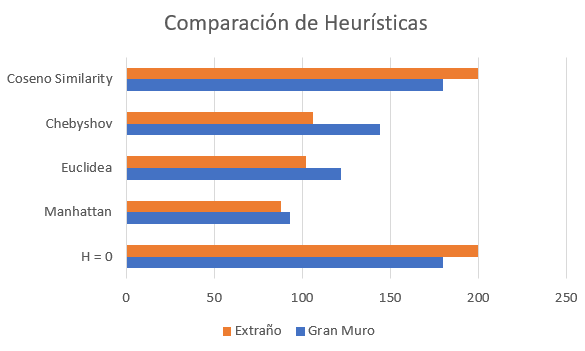

##Traza realizada a mano heurística Manhattan

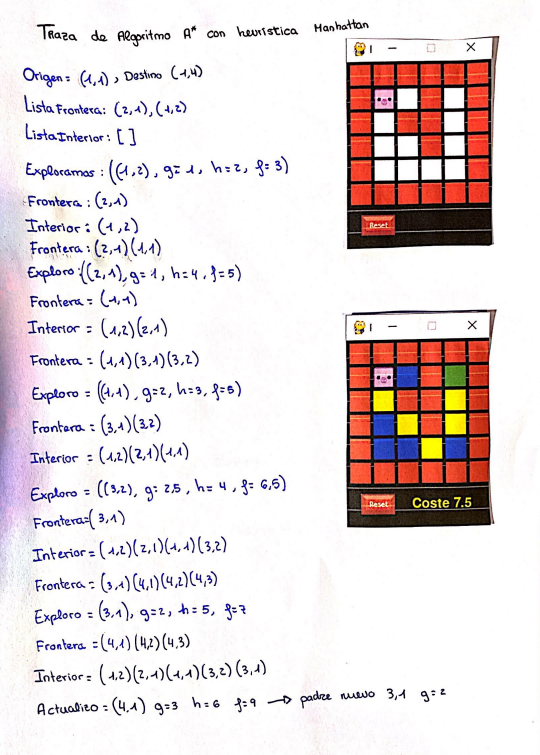

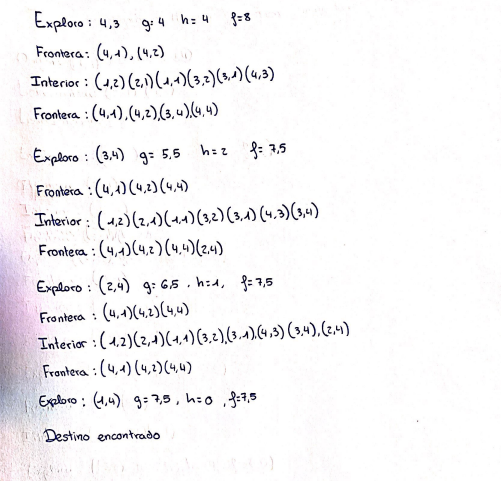

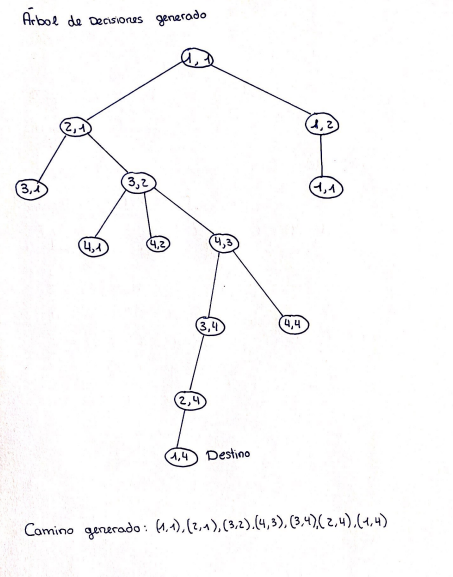